<a href="https://colab.research.google.com/github/allenwang0713/tebaml0315/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import cifar10
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [5]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

dog


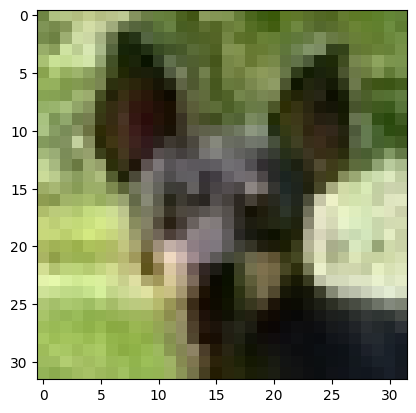

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
idx = 2500
print(trans[y_train[idx]])
plt.imshow(x_train[idx])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

layers = [
    # 1個filter(3 * 3 * 3) * 64(種) + 64(bias) -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種) + 128(bias) -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    # 256 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [8]:
# x: 0~1
# y: 配合loss這邊做Sparse
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
450/450 [==============================] - 17s 12ms/step - loss: 1.5391 - accuracy: 0.4333 - val_loss: 1.2158 - val_accuracy: 0.5630
Epoch 2/40
450/450 [==============================] - 6s 12ms/step - loss: 1.0678 - accuracy: 0.6202 - val_loss: 0.9265 - val_accuracy: 0.6778
Epoch 3/40
450/450 [==============================] - 6s 13ms/step - loss: 0.8632 - accuracy: 0.6986 - val_loss: 0.8191 - val_accuracy: 0.7142
Epoch 4/40
450/450 [==============================] - 6s 14ms/step - loss: 0.7255 - accuracy: 0.7463 - val_loss: 0.7344 - val_accuracy: 0.7480
Epoch 5/40
450/450 [==============================] - 6s 13ms/step - loss: 0.6227 - accuracy: 0.7812 - val_loss: 0.7119 - val_accuracy: 0.7548
Epoch 6/40
450/450 [==============================] - 5s 11ms/step - loss: 0.5293 - accuracy: 0.8182 - val_loss: 0.6861 - val_accuracy: 0.7658
Epoch 7/40
450/450 [==============================] - 5s 12ms/step - loss: 0.4398 - accuracy: 0.8456 - val_loss: 0.6440 - val_accuracy: 0.788

In [11]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6913 - accuracy: 0.7694


[0.6913405060768127, 0.7694000005722046]

In [12]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(trans[i]) for i in range(10)],
       columns=["{}(pred)".format(trans[i]) for i in range(10)])

313/313 [==============================] - 1s 3ms/step


,airplane(pred),automobile(pred),bird(pred),cat(pred),deer(pred),dog(pred),frog(pred),horse(pred),ship(pred),truck(pred)
airplane(true),840,12,23,19,5,13,8,3,57,20
automobile(true),5,875,6,9,2,5,9,1,28,60
bird(true),60,4,664,63,33,76,75,10,8,7
cat(true),18,6,36,594,29,219,65,15,5,13
deer(true),17,3,63,91,645,83,66,21,7,4
dog(true),13,3,20,125,22,768,19,14,6,10
frog(true),2,3,25,41,4,30,881,2,9,3
horse(true),21,6,29,57,47,125,9,690,5,11
ship(true),44,17,7,19,3,7,5,0,882,16
truck(true),27,55,2,15,2,9,4,3,28,855


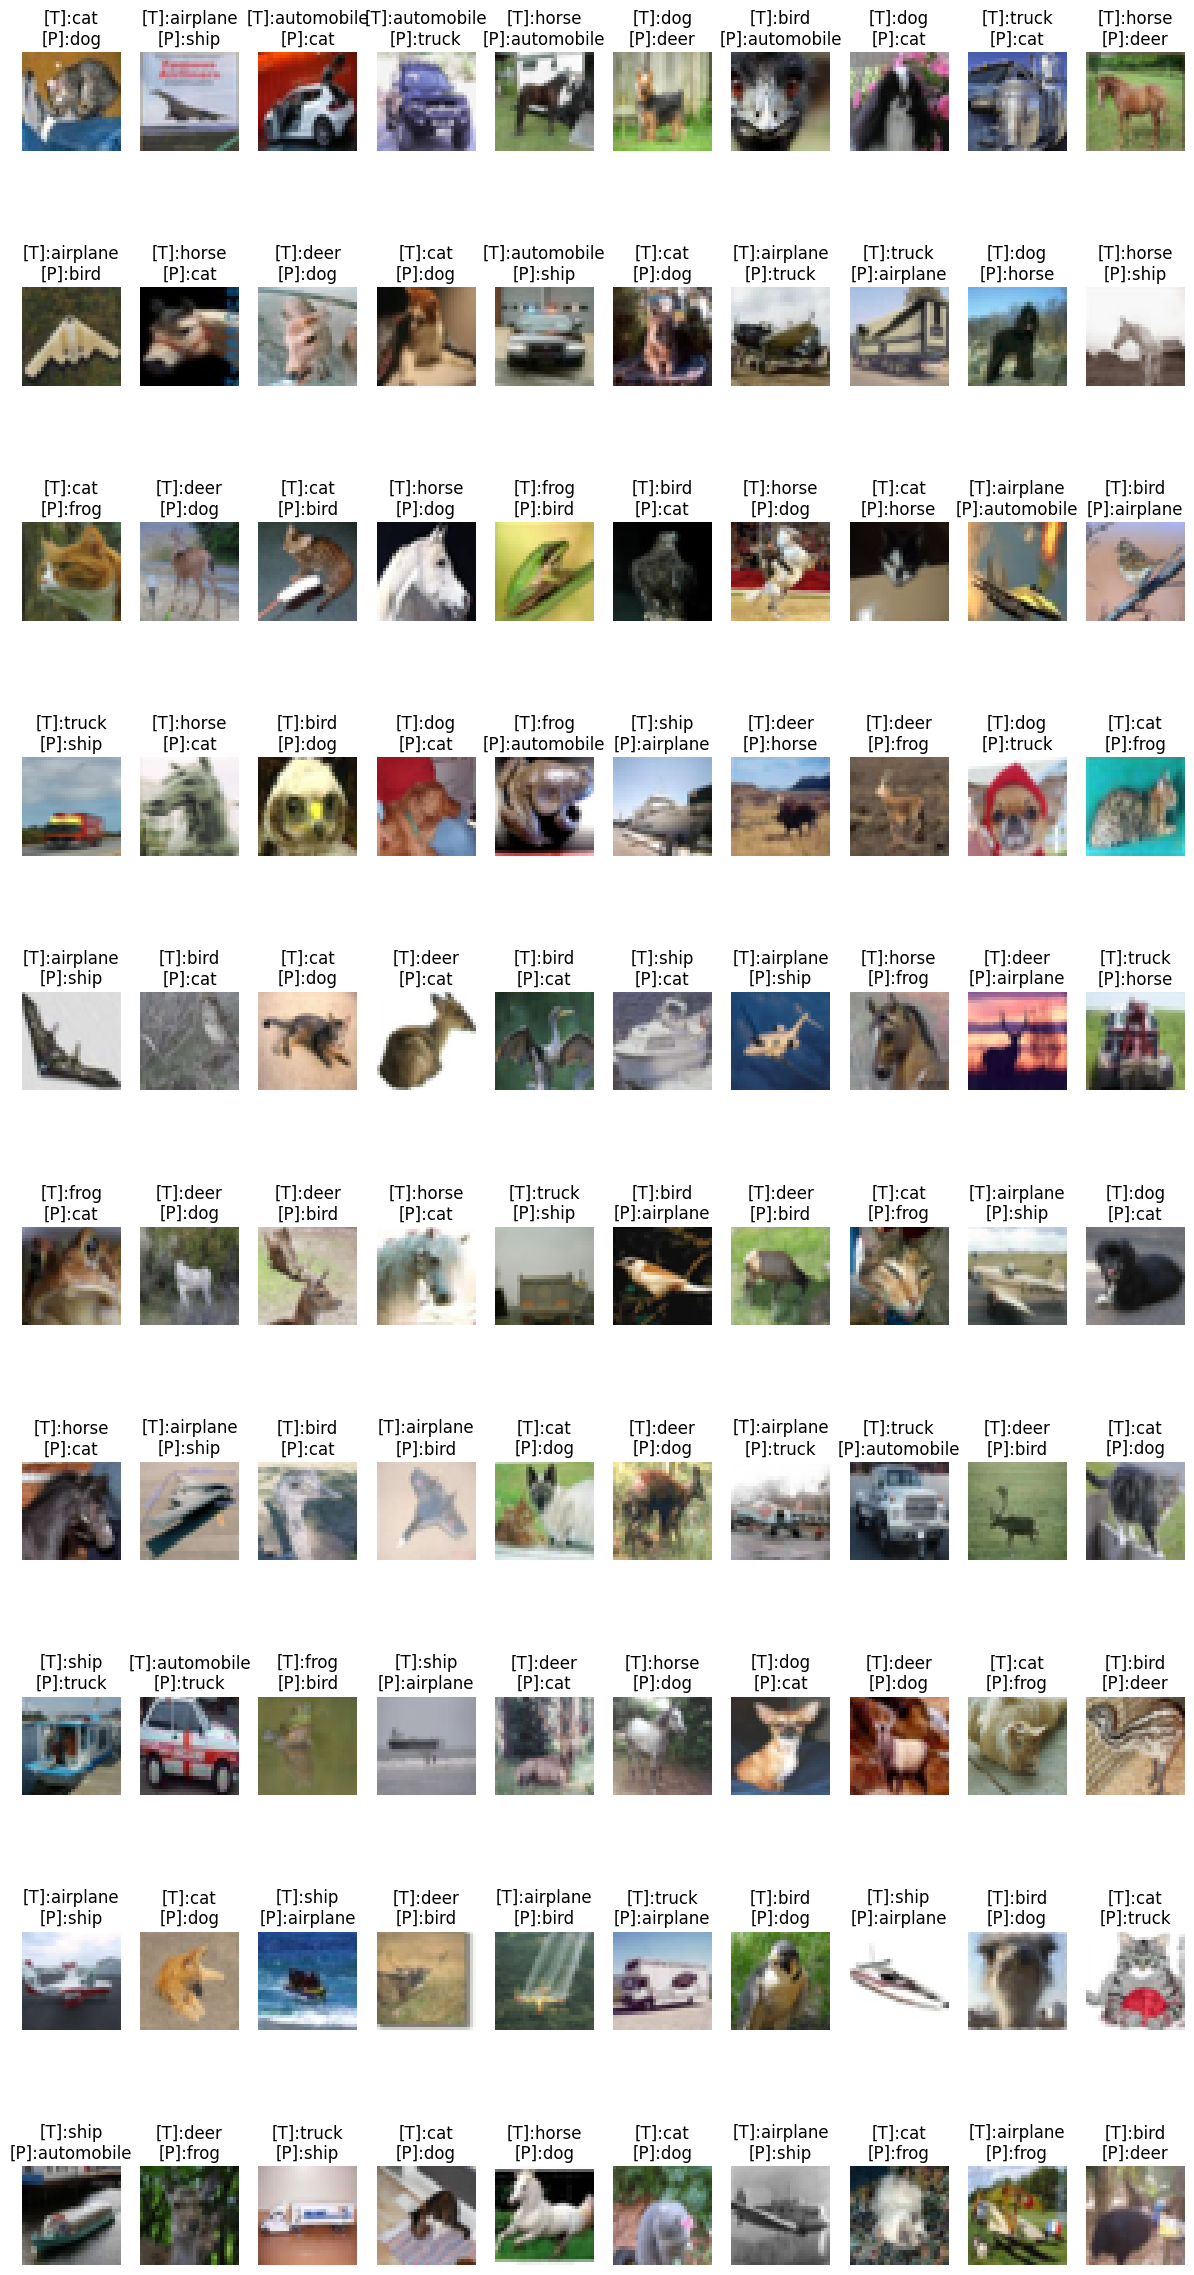

In [13]:
import numpy as np
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(15, 30))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(trans[fp_true[i]], trans[fp_pred[i]])
    plt.title(t)
    plt.imshow(fp_img[i])

1/1 [==============================] - 0s 173ms/step
airplane 的機率是: 0.0238
automobile 的機率是: 0.0271
bird 的機率是: 0.1446
cat 的機率是: 0.0492
deer 的機率是: 1e-04
dog 的機率是: 0.1696
frog 的機率是: 0.0018
horse 的機率是: 0.0189
ship 的機率是: 0.3629
truck 的機率是: 0.202
最高機率是: ship


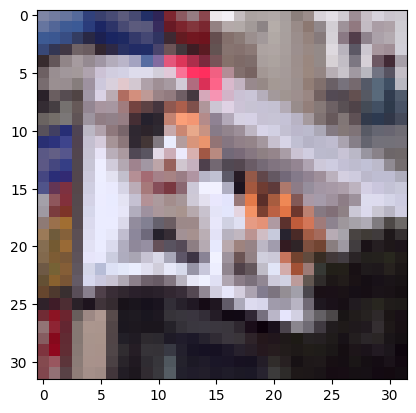

In [14]:
import requests
from PIL import Image
url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/aglzo4nc-1625740186.jpeg?crop=0.665xw:1.00xh;0.133xw,0&resize=640:*" #@param {type:"string"}
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}
response = requests.get(url, stream=True, headers=h)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
testx = img_np.reshape(1, 32, 32, 3) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(trans[i], "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", trans[ans])
plt.imshow(img_np)

1/1 [==============================] - 0s 72ms/step


<ipython-input-15-979b517efe49>:27: RuntimeWarning: invalid value encountered in true_divide
  fil = (fil - mi) / (ma - mi)


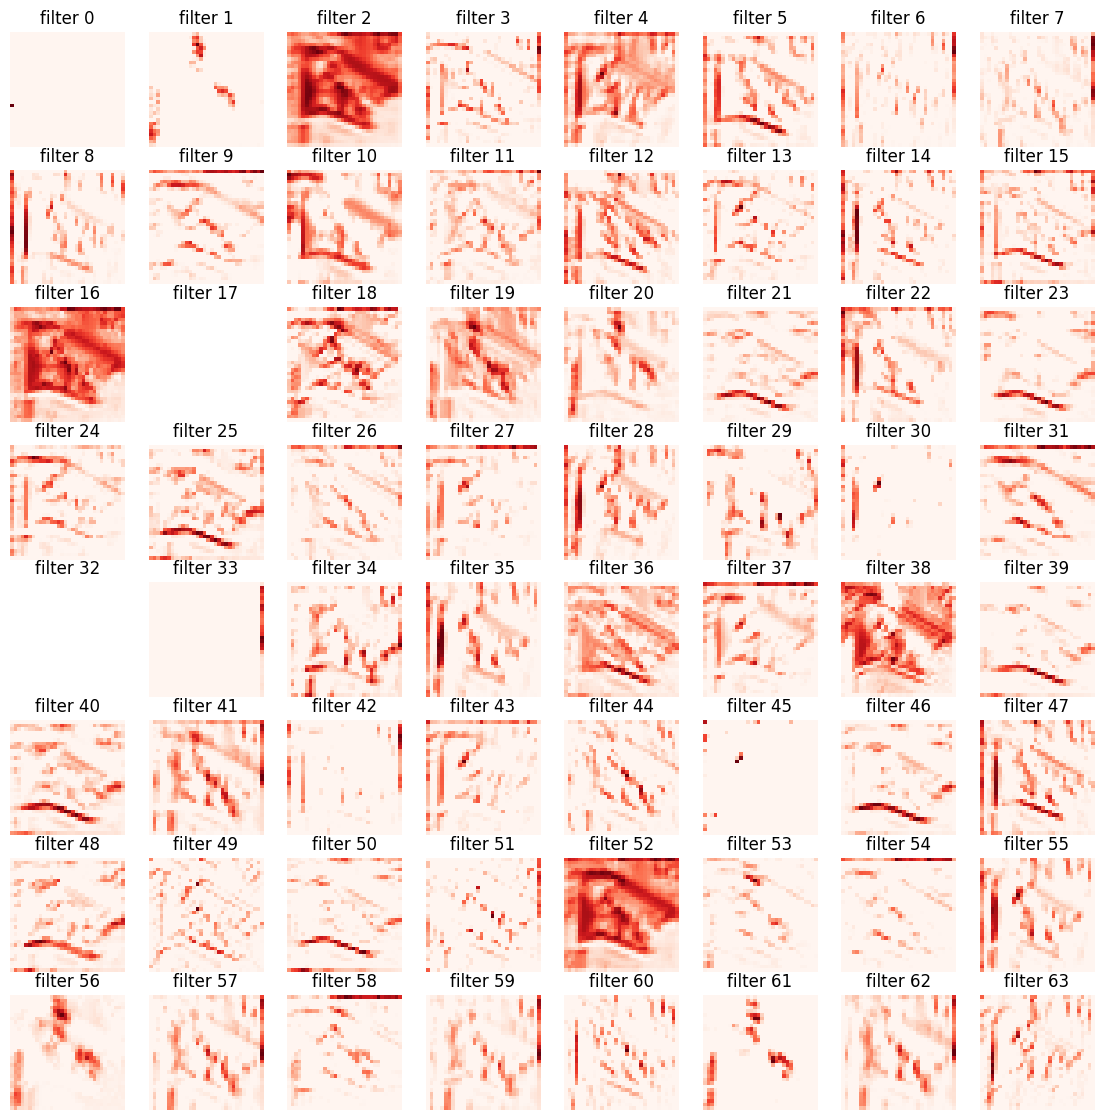

In [15]:
# first layer
layers = [
    model.layers[0]
]
# 256那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
# ]
# 512那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
#     model.layers[6],
# ]
partial = Sequential(layers)
conv = partial.predict(img_np.reshape(1, 32, 32, 3))[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")